In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Setup

In [3]:
r = 20
PAD=0
limx = [-r,r]
limy = [-r,r]
mesh_res = 25

In [4]:
X = np.linspace(limx[0],limx[1],mesh_res)
Y = np.linspace(limy[0],limy[1],mesh_res)
X,Y = np.meshgrid(X,Y)

In [5]:
def VectorFunction(X,Y):
    return [X*2, -Y*2]

# Plot

In [6]:
OutX,OutY = VectorFunction(X,Y)

In [7]:
plt.rcParams["figure.figsize"] = (12, 7)

(-20.0, 20.0)

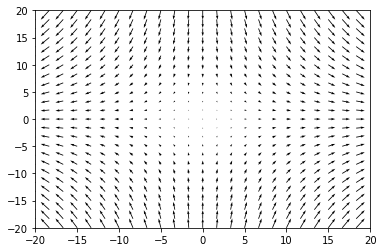

In [8]:
plt.quiver(X,Y,OutX,OutY)
plt.ylim(limx[0]-PAD,limx[1]+PAD)
plt.xlim(limy[0]-PAD,limy[1]+PAD)


In [9]:
# It is imcompressible.. as you see to the right.. though it seems like its stretched horizontally more, 
# its also strentched vertically less in the same proportion

In [10]:
# IT Is a saddle.. yes

# GenericVectorField class

In [75]:
class VectorField:
    def __init__(self,r=20,PAD=0, mesh_res=25, vector_function=lambda X,Y:[X*2, -Y*2]):
        
        self.vector_function = vector_function
    
        self.r = 20
        self.PAD = PAD
        self.limx = [-r,r]
        self.limy = [-r,r]
        self.mesh_res = mesh_res
        
        self.X = np.linspace(self.limx[0],self.limx[1],self.mesh_res)
        self.Y = np.linspace(self.limy[0],self.limy[1],self.mesh_res)
        self.X,self.Y = np.meshgrid(self.X,self.Y)
        
    def set_function(self, f):
        self.vector_function = f
        
    def plot_field(self,h=12, w=7, points=[]):
        OutX,OutY = self.vector_function(self.X,self.Y)
        plt.rcParams["figure.figsize"] = (h, w)
        plt.quiver(self.X,self.Y,OutX,OutY)
        plt.ylim(self.limx[0]-self.PAD,self.limx[1]+self.PAD)
        plt.xlim(self.limy[0]-self.PAD,self.limy[1]+self.PAD)
        for point in points:
            plt.scatter(point[0], point[1])
    
    def plot_field_cmap(self,h=12, w=7, points=[],cmap='jet', size=10):
        OutX,OutY = self.vector_function(self.X,self.Y)
        
        magnitude = np.log(np.sqrt(OutX**2 + OutY**2))
        plt.rcParams["figure.figsize"] = (h, w)
        
        plt.scatter(self.X, self.Y, c=magnitude, cmap=cmap, s=size)
        plt.colorbar(label='Magnitude')

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Vector Intensity Plot')
    
        
        
    def plot_divergence_cmap(self,h=12, w=7, points=[],cmap='jet', size=10):
        d = 0.001
        OutX,OutY = self.vector_function(self.X,self.Y)
        OutX_, OutY_ = self.vector_function(self.X+h, self.Y+h)
        
        derivX = (OutY_ + OutY)/d
        derivY = (OutX_ + OutX)/d

        divergence = (derivX*OutX + derivY*OutY)
    
        plt.rcParams["figure.figsize"] = (h, w)
        
        plt.scatter(self.X, self.Y, c=divergence, cmap=cmap, s=size)
        
        plt.colorbar(label='Divergence')

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Vector Intensity Plot')
            
    def plot_divergence(self,h=12, w=7, points=[],cmap='jet', size=10):
        d = 0.001
        OutX,OutY = self.vector_function(self.X,self.Y)
        OutX_, OutY_ = self.vector_function(self.X+h, self.Y+h)
        
        derivX = (OutY_ + OutY)/d
        derivY = (OutX_ + OutX)/d

        divergence = (derivX*OutX + derivY*OutY)
    
        plt.rcParams["figure.figsize"] = (h, w)
        
        plt.quiver(self.X,self.Y,derivX*OutX,derivY*OutY)
        plt.ylim(self.limx[0]-self.PAD,self.limx[1]+self.PAD)
        plt.xlim(self.limy[0]-self.PAD,self.limy[1]+self.PAD)
        for point in points:
            plt.scatter(point[0], point[1])
        

In [76]:
vector_field = VectorField(vector_function=ElectrostaticFieldSingleCharge, mesh_res=100,r=2)
vector_field.plot_divergence(points =[],h=15,w=15)

Error in callback <function _draw_all_if_interactive at 0x000002CFF8D731F0> (for post_execute):


ValueError: operands could not be broadcast together with shapes (10000,) (100,100) 

ValueError: operands could not be broadcast together with shapes (10000,) (100,100) 

<Figure size 1080x1080 with 1 Axes>

# Ocean Gyres

In [68]:
np.clip(-23,0,1)

0

In [69]:

def OceanGyres(X,Y):
    return [
        np.pi*np.sin(np.pi*X)*np.cos(np.pi*Y),
        -np.pi*np.cos(np.pi*X)*np.sin(np.pi*Y)
    ]

In [70]:
vector_field = VectorField(vector_function=OceanGyres, mesh_res=20,r=1.5)

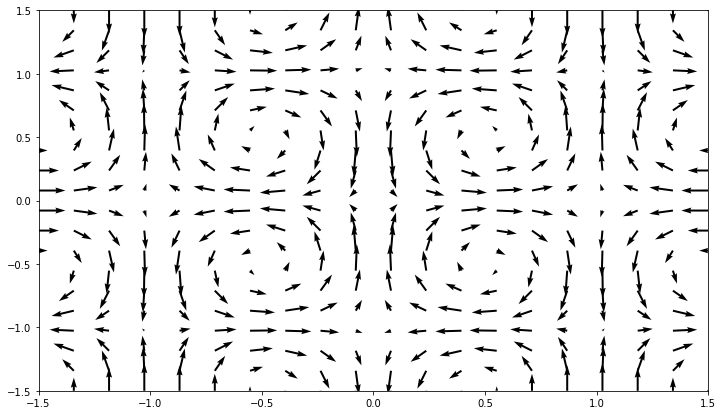

In [71]:
vector_field.plot_field()

# Electrostatic Field

In [72]:
def ElectrostaticFieldSingleCharge(X, Y, Pq=[0.5, 0], q=-10, eps=8.85e-12):
#     force per charge q0 E(p) = F(p)/2, p(x,y)
#     Pq: acting charge
    r = np.sqrt((Pq[0]-X)**2 + (Pq[1]-Y)**2)
#     positionVector = P2-P1 (P2=X, P1 = mainCharge (Pq))
    unitX = (X-Pq[0])/r
    unitY = (Y-Pq[1])/r
    
    
    return [
        (q*unitX)/(4*np.pi*eps*r**2),
        (q*unitY)/(4*np.pi*eps*r**2)
    ]

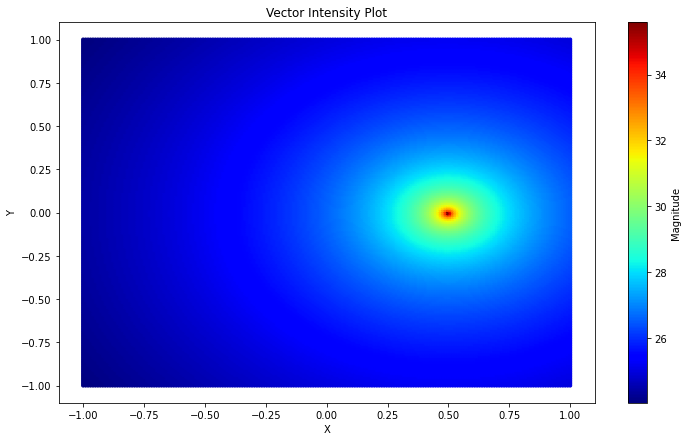

In [73]:
vector_field = VectorField(vector_function=ElectrostaticFieldSingleCharge, mesh_res=200,r=1)
vector_field.plot_field_cmap(points = [])

## Electrostatic field caused by the force of multiple charges acting on a single charge

In [15]:
P=np.array([[-1, -1], [0,0],[1,1],[-0.5,-0.5]])
Q = [1,1,1,1]
P = np.random.rand(4,2)
# Q = np.random.rand(5)
print(P.shape)
def ElectrostaticFieldThreeCharges(X, Y, Pq=P, q=Q, eps=8.85e-12):
#     force per charge q0 E(p) = F(p)/2, p(x,y)
#     Pq: acting charge
    nominatorX = np.zeros_like(X)
    nominatorY = np.zeros_like(Y)
    for i,pq in enumerate(Pq):
    # distance
        r = np.sqrt((pq[0]-X)**2 + (pq[1]-Y)**2)
    #     positionVector = P2-P1 (P2=X, P1 = mainCharge (Pq))
        unitX = (X-pq[0])/r
        unitY = (Y-pq[1])/r
        nominatorX += (unitX*q[i])/r**2
        nominatorY += (unitX*q[i])/r**2
    
    
    return [
        (nominatorX)/(4*np.pi*eps),
        (nominatorY)/(4*np.pi*eps)
    ]

(4, 2)


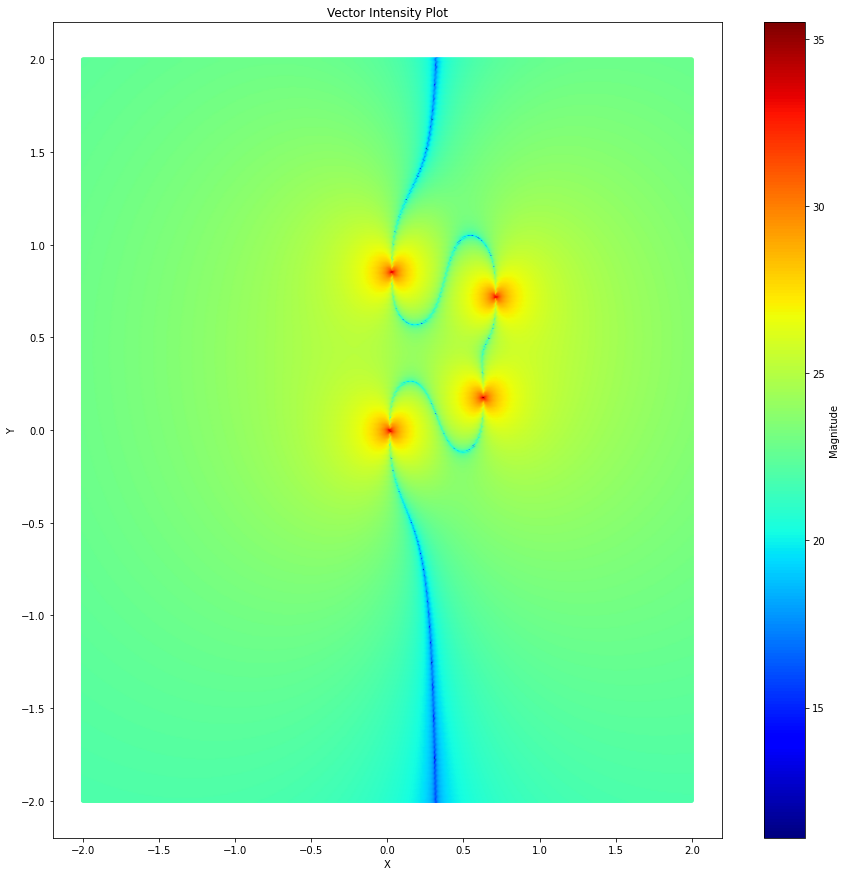

In [523]:
vector_field = VectorField(vector_function=ElectrostaticFieldThreeCharges, mesh_res=600,r=2)
vector_field.plot_field_cmap(points =[],h=15,w=15)